In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
nyc_sales_df = (pd.read_csv("NYC_Sales_Clean.csv"))

In [47]:
nyc_sales_df = nyc_sales_df.rename(columns={'GROSS SQUARE FEET': "SQFT"})
nyc_sales_df = nyc_sales_df[nyc_sales_df.SQFT !=" -  "]
nyc_sales_df["SQFT"] = pd.to_numeric(nyc_sales_df["SQFT"])


nyc_sales_df = nyc_sales_df.rename(columns={'LAND SQUARE FEET': "LSQFT"})
nyc_sales_df = nyc_sales_df[nyc_sales_df.LSQFT !=" -  "]
nyc_sales_df["LSQFT"] = pd.to_numeric(nyc_sales_df["LSQFT"])

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LSQFT', 'SQFT',
       'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE_PRICE', 'SALE PERIOD'],
      dtype='object')


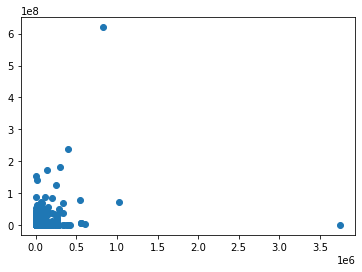

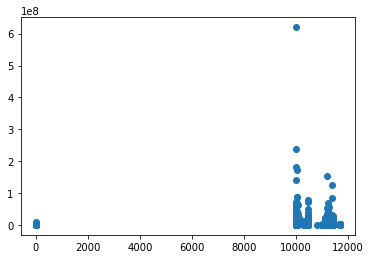

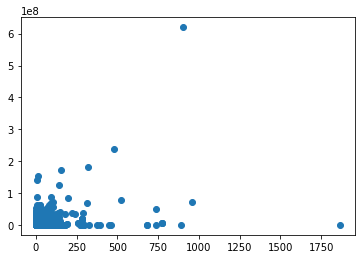

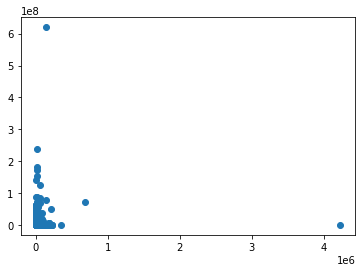

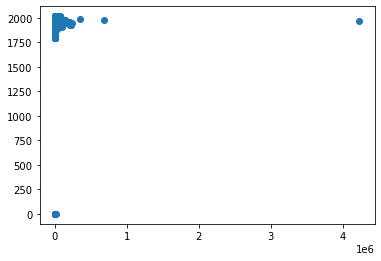

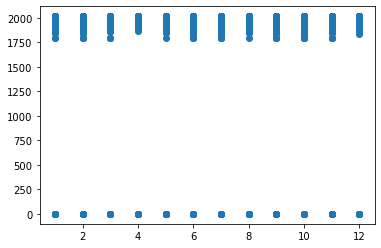

In [37]:
print(nyc_sales_df.columns)
##
x = nyc_sales_df['SQFT'].to_numpy().reshape(-1,1)
y = nyc_sales_df['SALE_PRICE']
plt.scatter(x,y)
plt.show()

x = nyc_sales_df['ZIP CODE'].to_numpy().reshape(-1,1)
y = nyc_sales_df['SALE_PRICE']
plt.scatter(x,y)
plt.show()

x = nyc_sales_df['TOTAL UNITS'].to_numpy().reshape(-1,1)
y = nyc_sales_df['SALE_PRICE']
plt.scatter(x,y)
plt.show()

x = nyc_sales_df['LSQFT'].to_numpy().reshape(-1,1)
y = nyc_sales_df['SALE_PRICE']
plt.scatter(x,y)
plt.show()

##
x = nyc_sales_df['LSQFT'].to_numpy().reshape(-1,1)
y = nyc_sales_df['YEAR BUILT']
plt.scatter(x,y)
plt.show()

x = nyc_sales_df['SALE PERIOD'].to_numpy().reshape(-1,1)
y = nyc_sales_df['YEAR BUILT']
plt.scatter(x,y)
plt.show()

In [48]:
for m in nyc_sales_df['SALE PERIOD'].unique():
    print(m)
nyc_sales_df = nyc_sales_df.replace({'SALE PERIOD': {'9-2016': 1, '10-2016': 2,
                                                     '11-2016': 3, '12-2016':4, '1-2017':5, '2-2017':6,
                                                     '3-2017':7, '4-2017':8, '5-2017':9, '6-2017':10, '7-2017':11,
                                                     '8-2017':12}})


7-2017
9-2016
11-2016
10-2016
6-2017
1-2017
4-2017
12-2016
2-2017
3-2017
8-2017
5-2017


In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [15]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression
# model = LinearRegression()
reg = LinearRegression().fit(X_train_scaled, y_train)
reg.score(X_test_scaled, y_test)

0.06218446150609014

<AxesSubplot:xlabel='SALE_PRICE'>

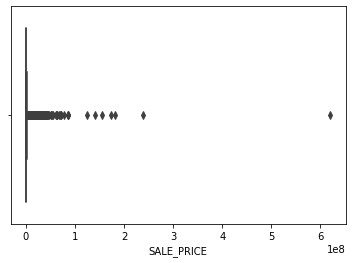

In [38]:
import seaborn as sns
sns.boxplot(x=nyc_sales_df['SALE_PRICE'])

In [39]:
Q1 = nyc_sales_df.quantile(0.25)
Q3 = nyc_sales_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ZIP CODE                        769.0
RESIDENTIAL UNITS                 1.0
COMMERCIAL UNITS                  0.0
TOTAL UNITS                       1.0
LSQFT                          1446.0
SQFT                           1424.0
YEAR BUILT                       40.0
TAX CLASS AT TIME OF SALE         1.0
SALE_PRICE                   655000.0
SALE PERIOD                       6.0
dtype: float64


In [40]:
nyc_sales_df.shape

(43349, 13)

0.002453624353444872